In [2]:
import pandas as pd
from pathlib import Path 
import seaborn as sns
import datetime as dt
%matplotlib inline
import numpy as np


In [3]:
csvpath = Path("/Users/yemifafo/Downloads/Pandas_homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
csvpath_1 = Path("/Users/yemifafo/Downloads/Pandas_homework/04-Pandas/Instructions/Starter_Code/Resources/l_historical.csv")
csvpath_2 = Path("/Users/yemifafo/Downloads/Pandas_homework/04-Pandas/Instructions/Starter_Code/Resources/otex_historical.csv")
csvpath_3 = Path("/Users/yemifafo/Downloads/Pandas_homework/04-Pandas/Instructions/Starter_Code/Resources/shop_historical.csv")
csvpath_4 = Path("/Users/yemifafo/Downloads/Pandas_homework/04-Pandas/Instructions/Starter_Code/Resources/sp_tsx_history.csv")
csvpath_5 = Path("/Users/yemifafo/Downloads/Pandas_homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
 

In [4]:
alog_returns_df=pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_historical_df=pd.read_csv(csvpath_1, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical_df=pd.read_csv(csvpath_2, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical_df=pd.read_csv(csvpath_3, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df=pd.read_csv(csvpath_4, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_df=pd.read_csv(csvpath_5, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [5]:
#alog_returns_df.head()

In [6]:
shop_historical_df.dtypes

Symbol     object
Close     float64
dtype: object

In [7]:
#Use the `dropna` function to drop whole records that have at least one null value
alog_returns_df.dropna(inplace=True)
alog_returns_df.head()
l_historical_df.dropna(inplace=True)
otex_historical_df.dropna(inplace=True)
shop_historical_df.dropna(inplace=True)
sp_tsx_history_df.dropna(inplace=True)
whale_returns_df.dropna(inplace=True)

In [8]:
#Sort index
alog_returns_df.sort_index
l_historical_df.sort_index
otex_historical_df.sort_index
shop_historical_df.sort_index
sp_tsx_history_df.sort_index
whale_returns_df.sort_index

<bound method DataFrame.sort_index of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000

In [9]:
#test sort 
alog_returns_df.head()
#shop_historical_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [10]:
#removing $ and , signs and changing datatype to float
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '', regex=False)
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',', '', regex=False).astype(float)

In [11]:
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
#Using pcnt chage to get 
sp_tsx_history_df = sp_tsx_history_df.pct_change()


In [13]:
sp_tsx_history_df.dropna(inplace=True)

In [14]:
sp_tsx_history_df.rename(columns = {'Close':'S&P_tsx_60'}, inplace = True)
sp_tsx_history_df.head()

,S&P_tsx_60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
column_appended_data = pd.concat([whale_returns_df, alog_returns_df, sp_tsx_history_df], axis="columns", join="inner")
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [16]:
column_appended_data.dropna(inplace=True)
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<AxesSubplot:title={'center':'Percent return of combined dataframe'}, xlabel='Date'>

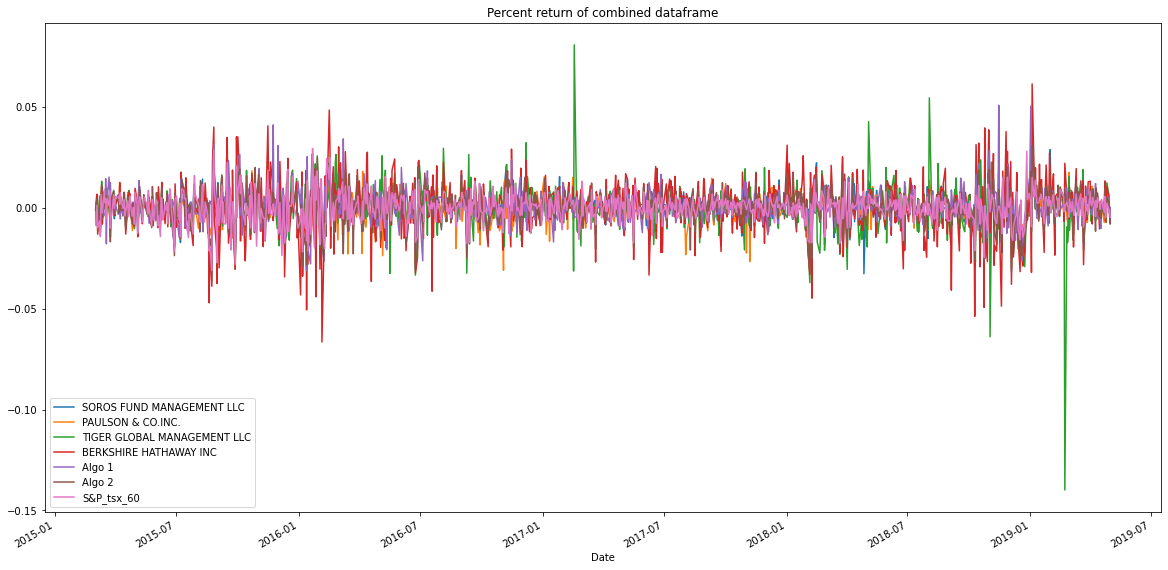

In [17]:
column_appended_data.plot(figsize=(20,10), title='Percent return of combined dataframe')

In [18]:
cumulative_returns = (1 + column_appended_data).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:title={'center':'Plot of cumulative returns of data frame'}, xlabel='Date'>

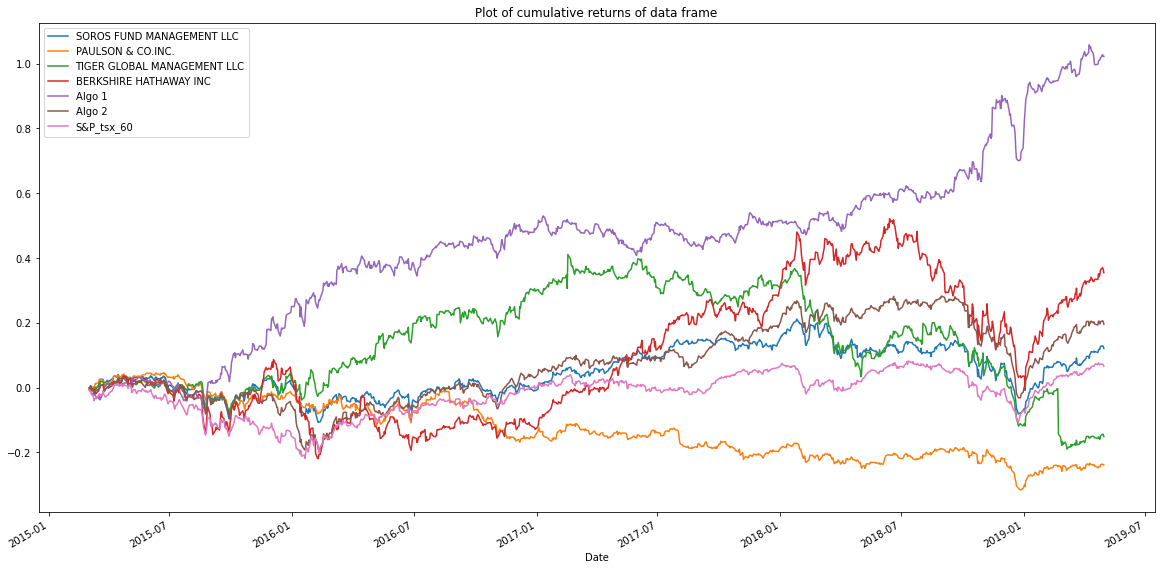

In [19]:
cumulative_returns.plot(figsize=(20,10), title='Plot of cumulative returns of data frame')

<AxesSubplot:>

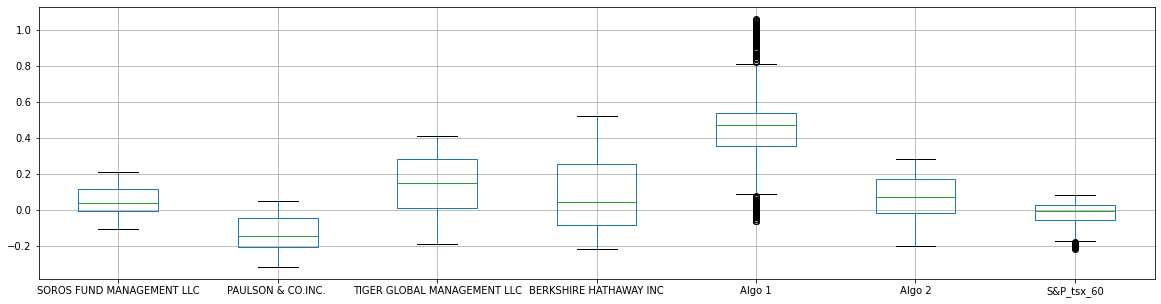

In [20]:
cumulative_returns.boxplot(figsize=(20,5))

In [35]:

Portfolio_std = column_appended_data.std()
Portfolio_std.sort_values()

#Portfolio_std.iloc[0, Portfolio_std.columns.get_loc('column_name')] > '0.007034

PAULSON & CO.INC.              0.006982
S&P_tsx_60                     0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [40]:
print(f'Algoo1 , Soros Fund, Algo2, Tiger Global and Berkshire Inc. were all riskier than S&P_TSX_60.') 

Algoo1 , Soros Fund, Algo2, Tiger Global and Berkshire were all riskier than S&P_TSX_60.


In [21]:
volatility = column_appended_data.std() * np.sqrt(252)
volatility.sort_values()

PAULSON & CO.INC.              0.110841
S&P_tsx_60                     0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

In [147]:
Rolling_std=column_appended_data.rolling(window=21).std()

<AxesSubplot:title={'center':'21 day rolling plot of daily percent returns'}, xlabel='Date'>

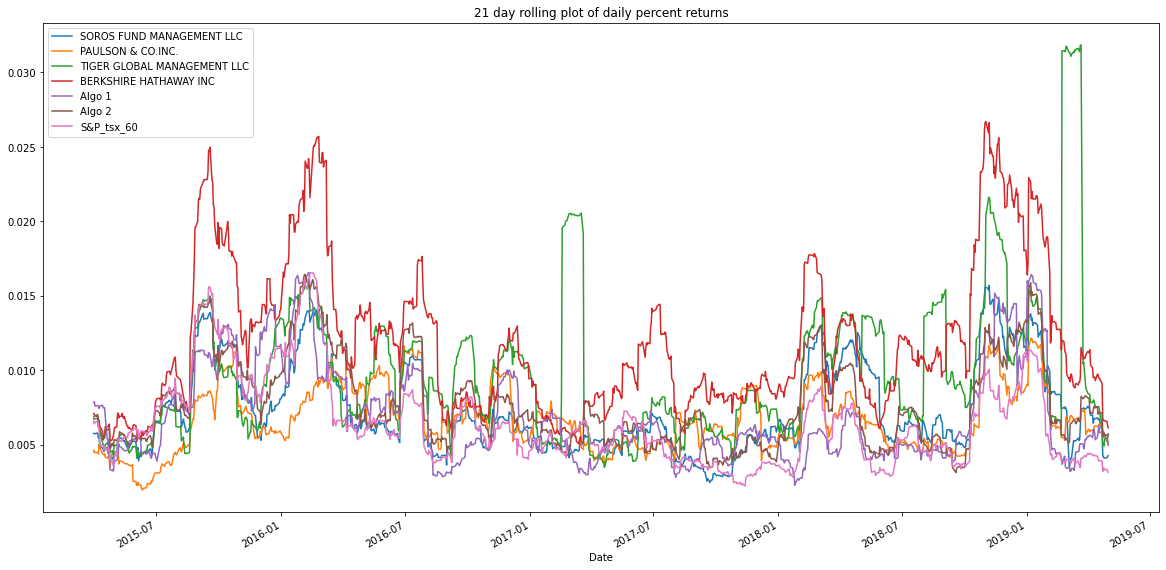

In [39]:


Rolling_std()
Rolling_std().plot(figsize=(20,10), title='21 day rolling plot of daily percent returns')

In [30]:
correlation = cumulative_returns.corr()

In [31]:
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
SOROS FUND MANAGEMENT LLC,1.000000,-0.599250,0.428731,0.879331,0.419924,0.898351,0.809598
PAULSON & CO.INC.,-0.599250,1.000000,-0.167546,-0.710741,-0.876459,-0.736731,-0.604204
TIGER GLOBAL MANAGEMENT LLC,0.428731,-0.167546,1.000000,0.064462,0.047300,0.242755,0.370814
BERKSHIRE HATHAWAY INC,0.879331,-0.710741,0.064462,1.000000,0.524672,0.920725,0.720103
Algo 1,0.419924,-0.876459,0.047300,0.524672,1.000000,0.590275,0.528311
Algo 2,0.898351,-0.736731,0.242755,0.920725,0.590275,1.000000,0.886327
S&P_tsx_60,0.809598,-0.604204,0.370814,0.720103,0.528311,0.886327,1.000000


<AxesSubplot:>

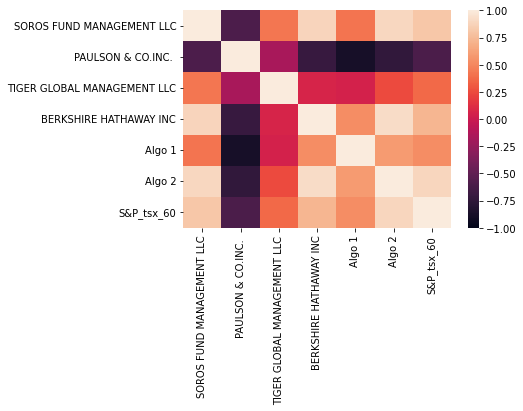

In [40]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [49]:
#Calculating co variance of SOROS FUND MANAGEMENT LLC. against S&P
Covariance_Soros=column_appended_data['SOROS FUND MANAGEMENT LLC'].cov(column_appended_data['S&P_tsx_60'])
print(f"Soros covariance with S&P: {Covariance_Soros}")

Soros covariance with S&P: 3.7106899078552236e-05


In [51]:
#Calculating variance of  S & P
Variance=column_appended_data['S&P_tsx_60'].var()
print(f" S & P Variance:{Variance}")                             

 S & P Variance:4.9479515915131015e-05


In [54]:
#Soros beta
Soros_beta=Covariance_Soros/Variance
print(f"Soros beta : {Soros_beta:.3f}")

Soros beta : 0.750


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros'}, xlabel='Date'>

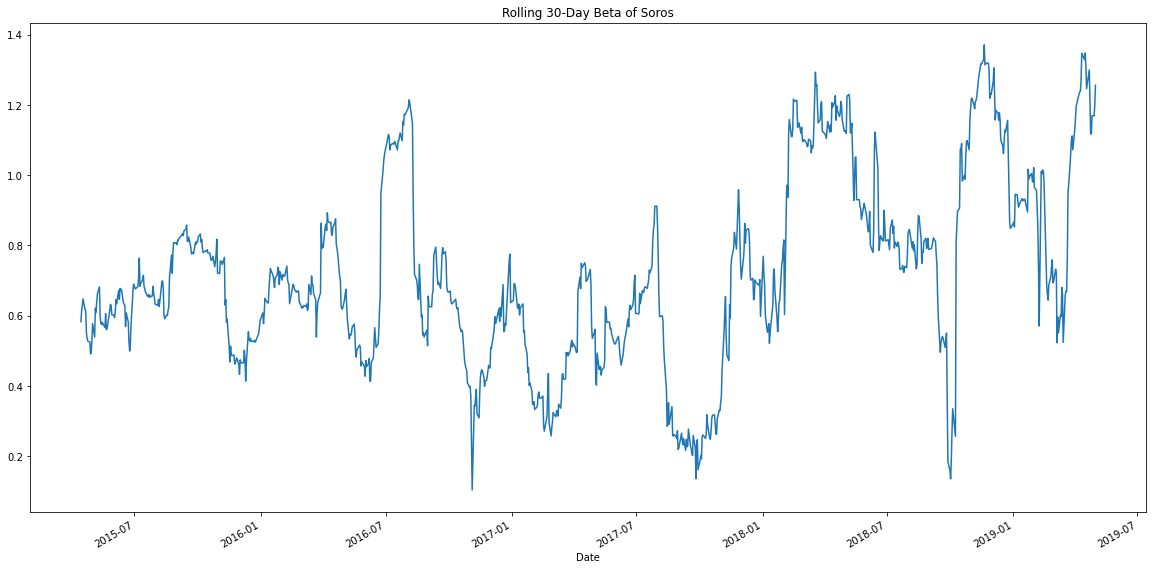

In [57]:
#Soros_beta.plot(figsize=(20,10), title='Soros Beta plot')
Rolling_Covariance_Soros=column_appended_data['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(column_appended_data['S&P_tsx_60'])
Rolling_Variance=column_appended_data['S&P_tsx_60'].rolling(window=30).var()
Rolling_Soros_beta=Rolling_Covariance_Soros/Rolling_Variance
Rolling_Soros_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of Soros")

<AxesSubplot:xlabel='Date'>

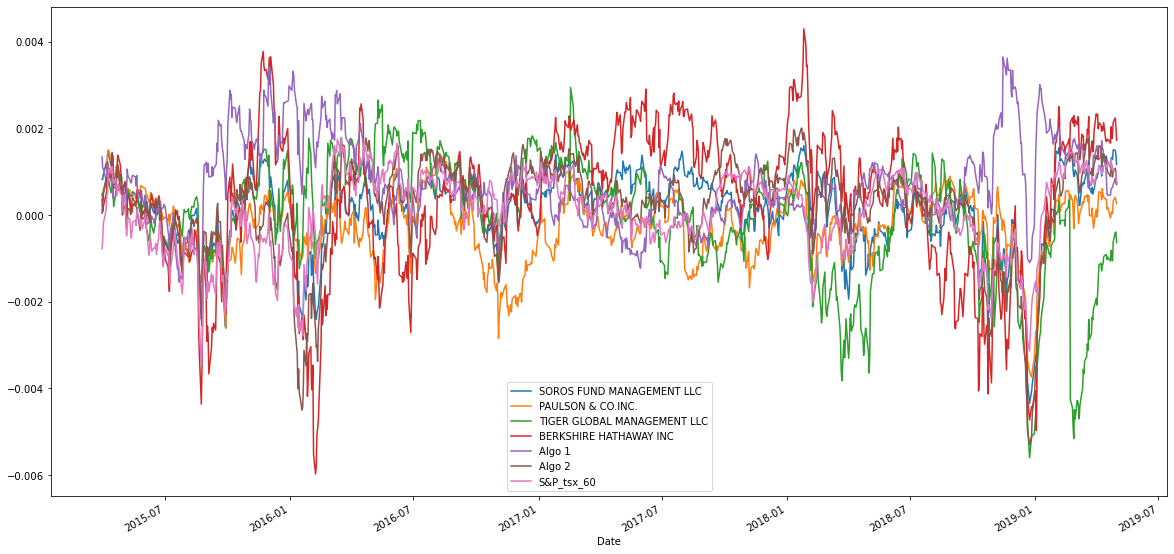

In [43]:
#Using ewm to calculate rolling std 
#times = ['2015-03-03','2019-05-01']
#Portfolio_ewm=column_appended_data.ewm(halflife='21 days',times=pd.DatetimeIndex(times)).mean()
#print(portfolio_ewm)
Portfolio_ewm=column_appended_data.ewm(min_periods = 21, halflife = 21).mean()
column_appended_data.ewm(min_periods = 21, halflife = 21).mean().plot(figsize=(20,10))

In [66]:
#Calculating sharpe ratio
Anualized_mean=column_appended_data.mean() * 252
sharpe_ratios = Anualized_mean / volatility
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_tsx_60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

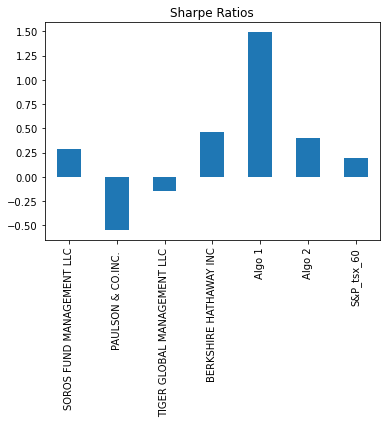

In [63]:
# Plot sharpe ratios using a bar chart
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [44]:
print(f'Algo_1 outperformed S&P and Whale portfolio')


Algo_1 outperformed S&P and Whale portfolio


In [72]:
Portfolio_Performance ={}
Portfolio_Performance = sharpe_ratios
print(Portfolio_Performance)

#print(f'These portfolios outperformed S&P : ({sharpe_ratios} >0.195550)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P_tsx_60                     0.195550
dtype: float64


In [74]:



Custom_Potfolio_df= pd.concat([l_historical_df, otex_historical_df, shop_historical_df], axis="columns", join="inner")



,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [77]:
Custom_Potfolio_df.columns = ['Symbol','L_historical', 'Symbol','Otex','Symbol','Shop']
Custom_Potfolio_df.head()

,Symbol,L_historical,Symbol,Otex,Symbol,Shop
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51


In [79]:
Custom_Potfolio_df.drop("Symbol", axis=1, inplace=True)

In [80]:
Custom_Potfolio_df.head()

,L_historical,Otex,Shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [87]:
Custom_Potfolio_df = Custom_Potfolio_df.pct_change()
#Custom_Potfolio_df.dropna(inplace=True)

In [88]:
Custom_Potfolio_df.head()


,L_historical,Otex,Shop
Date,,,
2018-01-04,NaN,NaN,NaN
2018-01-05,-0.017117,-2.659816,3.026150
2018-01-08,inf,-0.809772,10.304127
2018-01-09,-1.000000,-5.297260,-0.862509
2018-01-10,-0.195628,-4.962768,0.108587


In [101]:
weights = [0.33333,.033333, 0.33333]
Potfolio_retuns = Custom_Potfolio_df.dot(weights)
Potfolio_retuns.columns=['Custom_Potfolio']
Potfolio_retuns.head()
#Potfolio_retuns.dtypes

Date
2018-01-04         NaN
2018-01-05    0.914341
2018-01-08         inf
2018-01-09   -0.797404
2018-01-10   -0.194437
dtype: float64

In [111]:
Merged_potfolio = pd.concat([Potfolio_retuns, column_appended_data], axis="columns", join="inner")


In [112]:
Merged_potfolio.rename(columns={ Merged_potfolio.columns[0]: "Custom_ptfolio" }, inplace = True)

In [113]:
Merged_potfolio.head()

,Custom_ptfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
Date,,,,,,,,
2018-01-04,NaN,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.914341,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,inf,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.797404,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
2018-01-10,-0.194437,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368


In [118]:
Merged_potfolio.dropna(inplace=True)
Merged_potfolio = Merged_potfolio[np.isfinite(Merged_potfolio).all(1)]

In [119]:
Merged_potfolio.head()

,Custom_ptfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
Date,,,,,,,,
2018-01-05,0.914341,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-09,-0.797404,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
2018-01-10,-0.194437,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,-0.555003,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
2018-01-12,-1.924052,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.001304


In [121]:
Merged_potfolio_volatility = Merged_potfolio.std() * np.sqrt(252)
Merged_potfolio_volatility.sort_values()

S&P_tsx_60                       0.100253
PAULSON & CO.INC.                0.115378
Algo 1                           0.121531
Algo 2                           0.138959
SOROS FUND MANAGEMENT LLC        0.147181
TIGER GLOBAL MANAGEMENT LLC      0.222196
BERKSHIRE HATHAWAY INC           0.229490
Custom_ptfolio                 802.895758
dtype: float64

<AxesSubplot:title={'center':'21 day rolling plot of Merged Potfolio'}, xlabel='Date'>

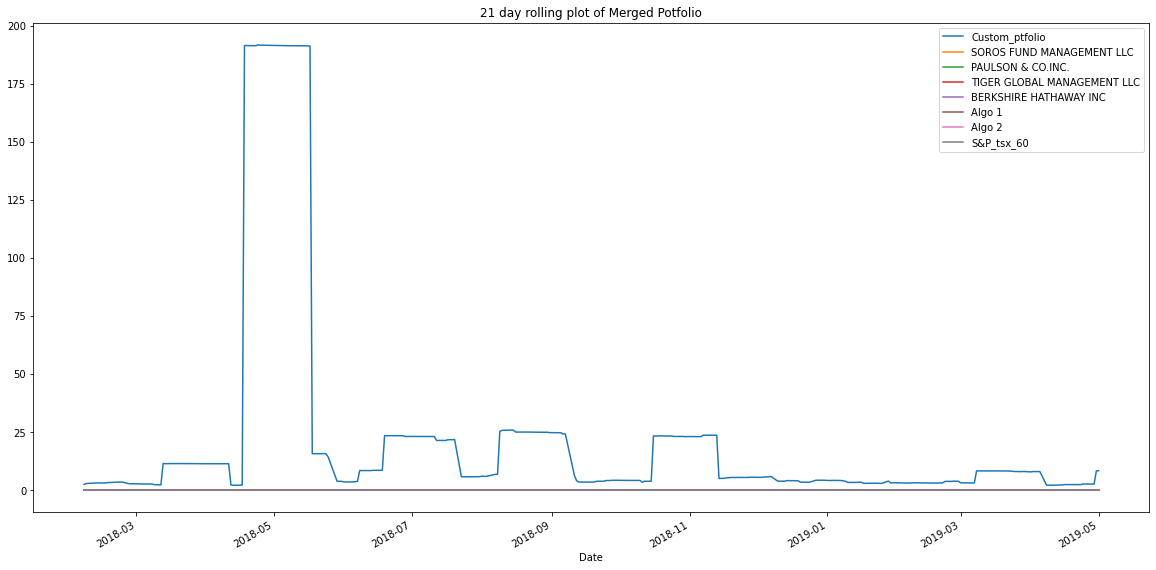

In [122]:
Rolling_std_merged_potfolio=Merged_potfolio.rolling(window=21).std
Rolling_std_merged_potfolio().plot(figsize=(20,10), title='21 day rolling plot of Merged Potfolio')

In [128]:
=(1 + Merged_potfolio).cumprod() - 1
cum_Merged_Potfolio.head()

,Custom_ptfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
Date,,,,,,,,
2018-01-05,0.914341,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-09,-0.612161,0.003040,0.001696,0.002527,0.022747,-0.004839,0.004301,-0.003772
2018-01-10,-0.687572,0.000279,-0.000598,-0.003207,0.017857,-0.001290,0.004076,-0.008124
2018-01-11,-0.860970,0.010822,0.011168,-0.005264,0.035834,-0.006897,0.021043,-0.005744
2018-01-12,-1.128471,0.013440,0.013613,-0.001476,0.038521,-0.007766,0.023505,-0.004447


In [129]:
cum_Merged_Potfolio_correlation = cum_Merged_Potfolio.corr()

In [131]:
cum_Merged_Potfolio_correlation

,Custom_ptfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_tsx_60
Custom_ptfolio,1.000000,-0.120883,-0.077435,-0.049334,-0.125914,0.075324,-0.127672,-0.160890
SOROS FUND MANAGEMENT LLC,-0.120883,1.000000,0.776716,0.720074,0.856941,-0.650454,0.884260,0.649230
PAULSON & CO.INC.,-0.077435,0.776716,1.000000,0.717691,0.530738,-0.520687,0.793629,0.600903
TIGER GLOBAL MANAGEMENT LLC,-0.049334,0.720074,0.717691,1.000000,0.494493,-0.890147,0.634001,0.269120
BERKSHIRE HATHAWAY INC,-0.125914,0.856941,0.530738,0.494493,1.000000,-0.552400,0.892655,0.763374
Algo 1,0.075324,-0.650454,-0.520687,-0.890147,-0.552400,1.000000,-0.622651,-0.176117
Algo 2,-0.127672,0.884260,0.793629,0.634001,0.892655,-0.622651,1.000000,0.820335
S&P_tsx_60,-0.160890,0.649230,0.600903,0.269120,0.763374,-0.176117,0.820335,1.000000


<AxesSubplot:>

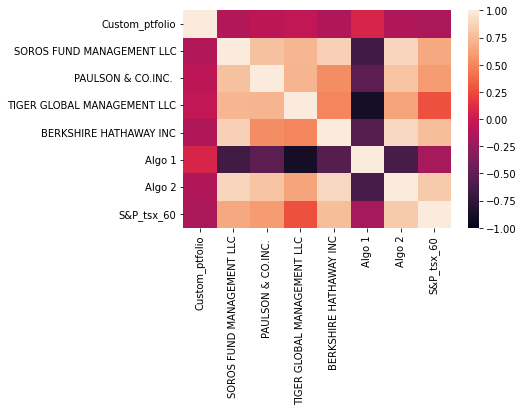

In [132]:
sns.heatmap(cum_Merged_Potfolio_correlation, vmin=-1, vmax=1)

In [137]:
Covariance_Custom_potfolio=cum_Merged_Potfolio['Custom_ptfolio'].cov(cum_Merged_Potfolio['S&P_tsx_60'])
print(f"Custom Potfolio covariance with S&P: {Covariance_Custom_potfolio}")

print(f" S & P Variance:{Variance}")   

Custom Potfolio covariance with S&P: -74610724888.53423
 S & P Variance:4.9479515915131015e-05


In [135]:
#Beta for Custom Potfolio
Custom_potfolio_beta=Covariance_Custom_potfolio/Variance
print(f" Custom Potfolio Beta : {Covariance_Custom_potfolio:.3f}")

 Custom Potfolio Beta : -6174203279.046


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Custom Potfolio'}, xlabel='Date'>

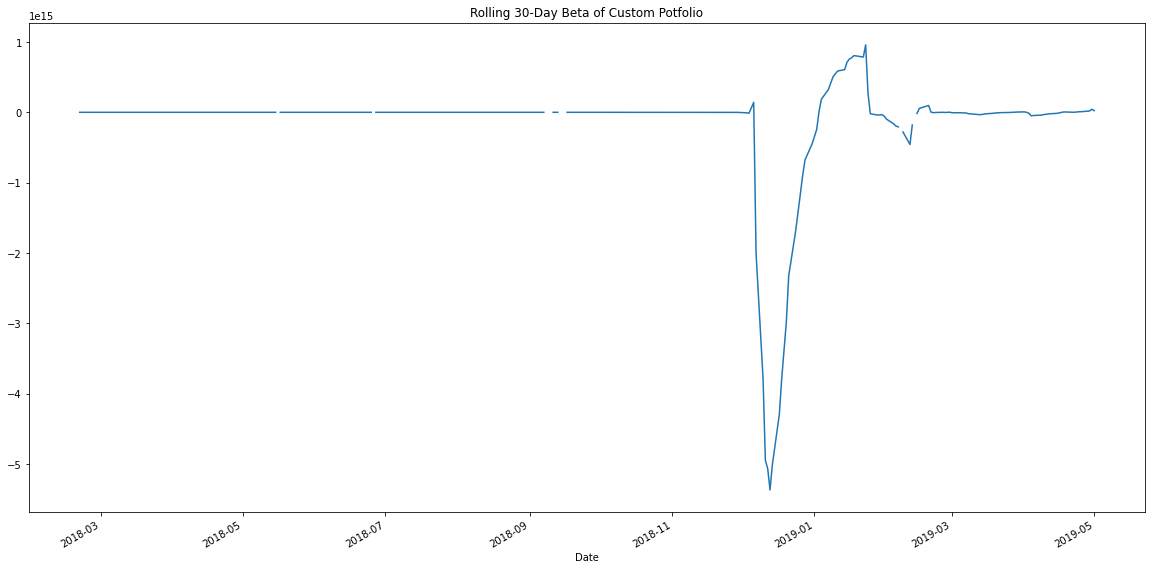

In [138]:
Rolling_Cov_custom_potfolio=cum_Merged_Potfolio['Custom_ptfolio'].rolling(window=30).cov(cum_Merged_Potfolio['S&P_tsx_60'])
Rolling_Variance=column_appended_data['S&P_tsx_60'].rolling(window=30).var()
Roln_cust_potfoli_beta=Rolling_Cov_custom_potfolio/Rolling_Variance
Roln_cust_potfoli_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of Custom Potfolio")


<AxesSubplot:title={'center':'Custom_sharpe_ratios'}>

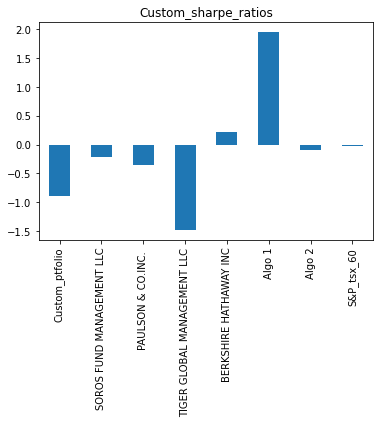

In [143]:
#Sharpe ratio for custom potfolio
Ann_cust_potfolio_mean=Merged_potfolio.mean() * 252
Custom_sharpe_ratios = Ann_cust_potfolio_mean / Merged_potfolio_volatility
Custom_sharpe_ratios.head()


# Plot sharpe ratios using a bar chart
Custom_sharpe_ratios.plot.bar(title="Custom_sharpe_ratios")

In [45]:
print('My custom potfolio perfomred poorly compared to S&P')


My custom potfolio perfomred poorly compared to S&P
